In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import seaborn as sns

In [21]:
mnist_x = pd.read_csv(r"mnist_X.csv",header=None)
mnist_y = pd.read_csv(r"mnist_label.csv",header=None)

## General steps to perform PCA

1. Take the whole dataset consisting of d-dimensional samples ignoring the class labels
2. Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
3. Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
4. Compute eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λλ1,λλ2,...,λλd)
5. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W(where every column represents an eigenvector)
6. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: y=W.T×X (where X is a d×1-dimensional vector representing one sample, and y is the transformed k×1-dimensional sample in the new subspace.)

reference:https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

In [22]:
# Preprocesss the data to get mean vector and subtract it from data
mu =np.mean(mnist_x, axis=0)
data= mnist_x-mu
#Calaculte covaraince matrix 
covariance_matrix = np.matmul(data.T, data)
#calcualte eigen values and eigen vectors
eigVals, eigVecs = eigh(covariance_matrix)

In [23]:
#sort the eigen values by decreasing order 
eigVals_largest =sorted(eigVals, reverse=True)[:5]
#print to see the actual values
eigVals_largest

[40245.94392003187,
 22238.50291035034,
 17176.257202046705,
 16313.94028373147,
 13902.022991499407]

## Explained Variance

After sorting the eigen values, the next question is "how many principal components are we going to choose for reduced feature space?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

We will use largest 2 eigen valuee and check how much information can be explained from first 2 components.

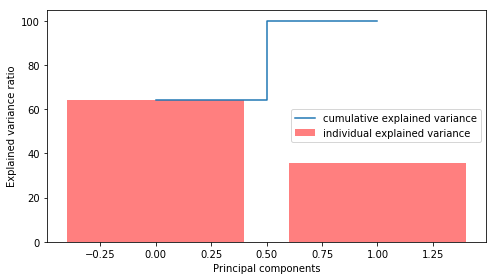

In [32]:
#sort the eigen values by decreasing order 
eigVals_largest2 =sorted(eigVals, reverse=True)[:2]

total=sum(eigVals_largest2)
var_exp = [(i / total)*100 for i in eigVals_largest2]
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(7, 4))
plt.bar(range(2), var_exp, alpha=0.5, color='r', align='center', label='individual explained variance')
plt.step(range(2), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='center right')
plt.tight_layout()
plt.savefig('var_exp.png', format='png', dpi=1200)
plt.show()

The first 2 principle components corresponding to largest 2 eigen values explain 99% of information in  the given data. 

In [26]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigVals[i]), eigVecs[:,i]) for i in range(len(eigVals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# form a d×k dimensional matrix W (where every column represents an eigenvector).
W = np.hstack((eig_pairs[0][1].reshape(784,1), eig_pairs[1][1].reshape(784,1)))
print('Matrix W Shape:\n', W.real.shape)
print('Matrix W :\n', W.real)

In [29]:
#Use this d×k eigenvector matrix to transform the samples onto the new subspace. Y=mnist_x×WW
Y = np.array(mnist_x).dot(W)
# prepare dataframe for visualization 
mnst_y = mnist_y.copy()
Y = np.vstack((Y.T, mnst_y.T))
Y = Y.T
Y = pd.DataFrame(Y, columns=['PC1','PC2', 'label'])
Y.label = Y.label.astype(np.int)
Y.head()

,PC1,PC2,label
0,7.344072,2.038688,1
1,7.436399,2.300943,1
2,5.285831,1.168484,1
3,6.734218,1.118901,1
4,9.603487,2.377783,1


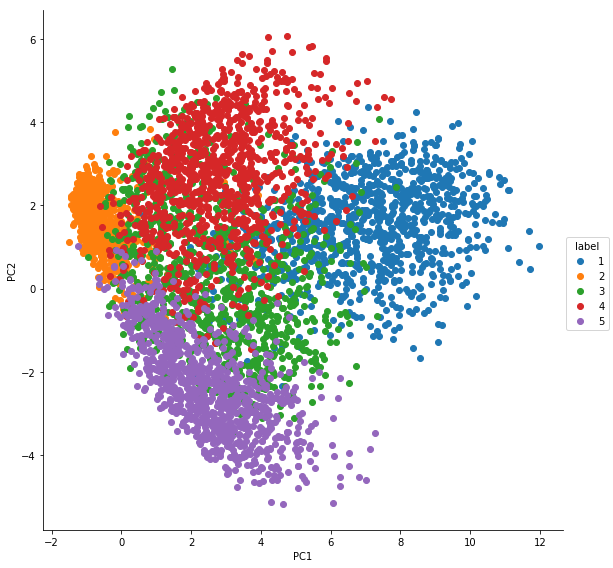

In [33]:
# visulize the first 2 components in 2D space
sns_plot = sns.FacetGrid(Y, hue='label', size=8).map(plt.scatter,'PC1','PC2').add_legend()
sns_plot.savefig("PCA.png")